In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Vi vælger alle de græskar ud, som er solgt i 'bushels' (Skæpper):



In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Vi beregner en gennemsnitspris og trækker måneden ud af hele datoen:

In [3]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

Vi laver et nyt dataframe og gør prisen ensartet uanset hvilken størrelse 'bushels' grækarene er
solgt i:


In [4]:
new_pumpkins = pd.DataFrame({'City': pumpkins['City Name'],'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 +1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins

,City,Month,Package,Low Price,High Price,Price
70,BALTIMORE,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,BALTIMORE,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,BALTIMORE,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,BALTIMORE,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,BALTIMORE,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...
1738,ST. LOUIS,9,1/2 bushel cartons,15.00,15.0,30.00
1739,ST. LOUIS,9,1/2 bushel cartons,13.75,15.0,28.75
1740,ST. LOUIS,9,1/2 bushel cartons,10.75,15.0,25.75
1741,ST. LOUIS,9,1/2 bushel cartons,12.00,12.0,24.00


Et grafisk overblik

Text(0, 0.5, 'pumpkin Price')

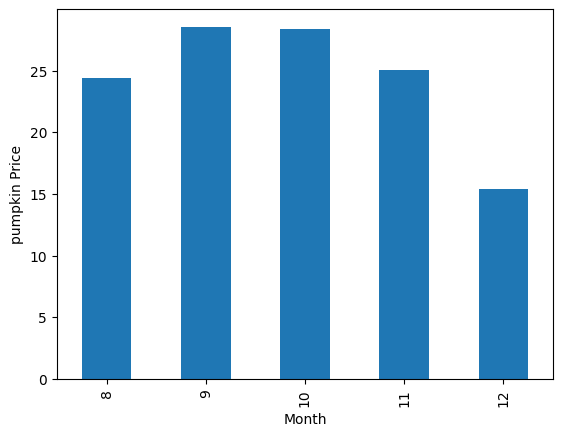

In [5]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("pumpkin Price")

Vi bruger labelencoder til at give 'City' en numerisk værdi:


In [6]:
from sklearn.preprocessing import LabelEncoder
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:,0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,City,Month,Package,Low Price,High Price,Price
70,1,1,0,5.0,3.0,13.50
71,1,1,0,10.0,7.0,16.20
72,1,2,0,10.0,7.0,16.20
73,1,2,0,9.0,6.0,15.30
74,1,2,0,5.0,3.0,13.50
...,...,...,...,...,...,...
1738,9,1,2,5.0,3.0,30.00
1739,9,1,2,3.0,3.0,28.75
1740,9,1,2,0.0,3.0,25.75
1741,9,1,2,1.0,0.0,24.00


Vi undersøger korelationen mellem 'City' og 'Price':


In [7]:
print(new_pumpkins['City'].corr(new_pumpkins['Price']))


AttributeError: 'float' object has no attribute 'shape'

Vi undersøger korelationen mellem 'Package' og 'Price-:

In [ ]:
print(new_pumpkins['Package'].corr(new_pumpkins['Price']))


AttributeError: 'float' object has no attribute 'shape'

Vi dropper nul-værdier:

In [ ]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

Vi laver et dataframe til linær regression:


In [ ]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in
new_columns], axis='columns')
lin_pumpkins

Vi slicer X og Y værdierne ud:


In [ ]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

Vi splitter datasættet i trænings- og testdata, fitter en linær regresionsmodel på
træningsdataene, lver en forudsigelse på test-dataene og printer modellens nøjagtighed:


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)
accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)


Grafisk kan det illustreres at modellen ikke er særlig god:

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.show()